# Аттестация 1.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Загрузка данных
df = sns.load_dataset('mpg')
# Сохраняем его в файл на ваш компьютер
df.to_csv('mpg_dataset.csv', index=False)  # index=False убирает индексы
print("Датасет сохранен как 'mpg_dataset.csv'")

Датасет сохранен как 'mpg_dataset.csv'


In [3]:
# Просмотр первых строк набора данных
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### ЗАДАНИЕ 2. Количество строк и столбцов

In [4]:
# Количество строк и столбцов
rows, columns = df.shape
print(f'Количество строк: {rows}, Количество столбцов: {columns}')

Количество строк: 398, Количество столбцов: 9


### ЗАДАНИЕ 3. РАЗВЕДОЧНЫЙ АНАЛИЗ

#### (a) для каждой числовой переменной вычислить

In [5]:
# (a) Анализ числовых переменных
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_summary = pd.DataFrame()
for col in numeric_cols:
    numeric_summary[col] = [
        df[col].isnull().mean(),                      # Доля пропусков
        df[col].min(),                               # Минимальное значение
        df[col].max(),                               # Максимальное значение
        df[col].mean(),                              # Среднее значение
        df[col].median(),                            # Медиана
        df[col].var(),                               # Дисперсия
        df[col].quantile(0.1),                       # Квантиль 0.1
        df[col].quantile(0.9),                       # Квантиль 0.9
        df[col].quantile(0.25),                      # Квартиль 1
        df[col].quantile(0.75)                       # Квартиль 3
    ]

In [6]:
numeric_summary = numeric_summary.transpose()
numeric_summary.columns = [
    'Доля пропусков', 'Минимум', 'Максимум', 'Среднее', 
    'Медиана', 'Дисперсия', 'Квантиль 0.1', 
    'Квантиль 0.9', 'Квартиль 1', 'Квартиль 3'
]
print(numeric_summary)

              Доля пропусков  Минимум  Максимум      Среднее  Медиана  \
mpg                 0.000000      9.0      46.6    23.514573     23.0   
cylinders           0.000000      3.0       8.0     5.454774      4.0   
displacement        0.000000     68.0     455.0   193.425879    148.5   
horsepower          0.015075     46.0     230.0   104.469388     93.5   
weight              0.000000   1613.0    5140.0  2970.424623   2803.5   
acceleration        0.000000      8.0      24.8    15.568090     15.5   
model_year          0.000000     70.0      82.0    76.010050     76.0   

                  Дисперсия  Квантиль 0.1  Квантиль 0.9  Квартиль 1  \
mpg               61.089611          14.0         34.33      17.500   
cylinders          2.893415           4.0          8.00       4.000   
displacement   10872.199152          90.0        350.00     104.250   
horsepower      1481.569393          67.0        157.70      75.000   
weight        717140.990526        1988.5       4275.20    2

#### (b) для каждой категориальной переменной вычислить

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_summary = pd.DataFrame()

for col in categorical_cols:
    categorical_summary[col] = [
        df[col].isnull().mean(),                     # Доля пропусков
        df[col].nunique(),                           # Количество уникальных значений
        df[col].mode()[0]                            # Мода
    ]

In [8]:
categorical_summary = categorical_summary.transpose()
categorical_summary.columns = [
    'Доля пропусков', 'Количество уникальных значений', 'Мода'
]
print(categorical_summary)

       Доля пропусков Количество уникальных значений        Мода
origin            0.0                              3         usa
name              0.0                            305  ford pinto


### ЗАДАНИЕ 4.  Сформулировать и проверьте минимум 2 статистические гипотезы.

#### Гипотеза 1: Средняя мощность двигателя (horsepower) автомобилей с высоким MPG больше
#### чем у автомобилей с низким MPG.

In [9]:
# Разделим данные на две группы по медиане MPG
median_mpg = df['mpg'].median()
group_high_mpg = df[df['mpg'] > median_mpg]['horsepower'].dropna()
group_low_mpg = df[df['mpg'] <= median_mpg]['horsepower'].dropna()

# Т-тест для независимых выборок
t_statistic, p_value = stats.ttest_ind(group_high_mpg, group_low_mpg)

print(f'T-Statistic: {t_statistic}, P-Value: {p_value}')
if p_value < 0.05:
    print("p_value = ", p_value, " < 0.05")
    print('Нулевая гипотеза не верна')
    print("Средняя мощность двигателя (horsepower) автомобилей с высоким MPG больше чем у автомобилей с низким MPG.")
else:
    
    print( print("p_value = ", p_value, " >= 0.05"))
    print('Нулевая гипотеза  верна')
    print("Наше предположение не верно")

T-Statistic: -16.85827591468359, P-Value: 2.727796432243176e-48
p_value =  2.727796432243176e-48  < 0.05
Нулевая гипотеза не верна
Средняя мощность двигателя (horsepower) автомобилей с высоким MPG больше чем у автомобилей с низким MPG.


####  Гипотеза 2: Вес автомобиля (weight) влияет на MPG.



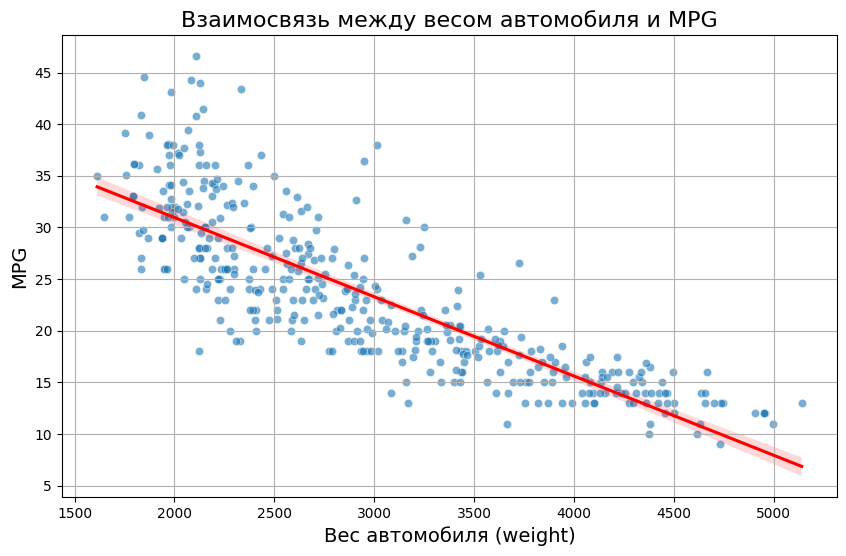

In [10]:
# Удаляем строки с пропущенными значениями в колонках 'weight' и 'mpg'
df = df.dropna(subset=['weight', 'mpg'])

# Визуализация: график рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='mpg', alpha=0.6)
sns.regplot(data=df, x='weight', y='mpg', scatter=False, color='red')

# Настройка графика
plt.title('Взаимосвязь между весом автомобиля и MPG', fontsize=16)
plt.xlabel('Вес автомобиля (weight)', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.grid()

# Показать график
plt.show()

In [11]:
# Вывод коэффициента корреляции
correlation = df['mpg'].corr(df['weight'])
print(f'Коэффициент корреляции между весом и MPG: {correlation:.4f}')

# Условия интерпретации
if correlation < -0.7:
    print("Сильная отрицательная корреляция: увеличивающийся вес автомобиля приводит к снижению MPG.")
elif correlation < -0.3:
    print("Умеренная отрицательная корреляция: вес автомобиля и MPG имеют некоторую отрицательную связь.")
elif correlation > 0.3:
    print("Умеренная положительная корреляция: вес автомобиля и MPG имеют некоторую положительную связь.")
else:
    print("Слабая или отсутствующая корреляция: вес автомобиля и MPG не имеют значимой связи.")


Коэффициент корреляции между весом и MPG: -0.8317
Сильная отрицательная корреляция: увеличивающийся вес автомобиля приводит к снижению MPG.


### ЗАДАНИЕ 5. Реализовать стохастический и обычный градиентный спуск вручную

In [12]:
# данные
x = df['horsepower'].dropna().values
y = df['mpg'].dropna().values

In [13]:
# Размер данных
print(len(x), len(y))

392 398


In [14]:
# Удаляем строки с пропущенными значениями в колонках 'horsepower' и 'mpg'
df_clean = df.dropna(subset=['horsepower', 'mpg'])

# Применение к данным
x = df_clean['horsepower'].values
y = df_clean['mpg'].values

# Теперь x и y имеют одинаковую длину и соответствуют друг другу
# Размер данных
print(len(x), len(y))

392 392


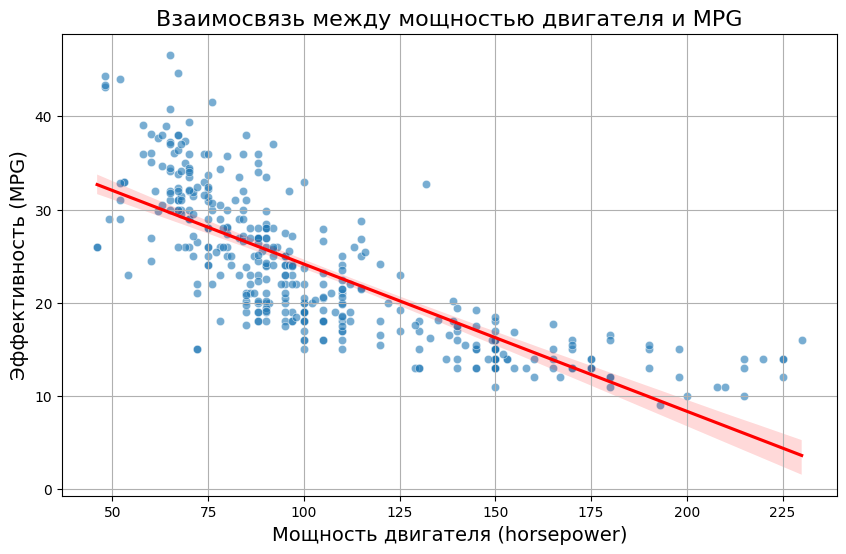

Коэффициент корреляции между мощностью двигателя и MPG: -0.7784
Сильная отрицательная корреляция: увеличивающаяся мощность двигателя приводит к снижению MPG.


In [15]:
# Визуализация: график рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.6)
sns.regplot(x=x, y=y, scatter=False, color='red')

# Настройка графика
plt.title('Взаимосвязь между мощностью двигателя и MPG', fontsize=16)
plt.xlabel('Мощность двигателя (horsepower)', fontsize=14)
plt.ylabel('Эффективность (MPG)', fontsize=14)
plt.grid()

# Показать график
plt.show()

# Вычисление коэффициента корреляции
correlation = np.corrcoef(x, y)[0, 1]
print(f'Коэффициент корреляции между мощностью двигателя и MPG: {correlation:.4f}')

# Условия интерпретации
if correlation < -0.7:
    print("Сильная отрицательная корреляция: увеличивающаяся мощность двигателя приводит к снижению MPG.")
elif correlation < -0.3:
    print("Умеренная отрицательная корреляция: мощность двигателя и MPG имеют некоторую отрицательную связь.")
elif correlation > 0.3:
    print("Умеренная положительная корреляция: мощность двигателя и MPG имеют некоторую положительную связь.")
else:
    print("Слабая или отсутствующая корреляция: мощность двигателя и MPG не имеют значимой связи.")


#### Первого порядка (Линейная регрессия)

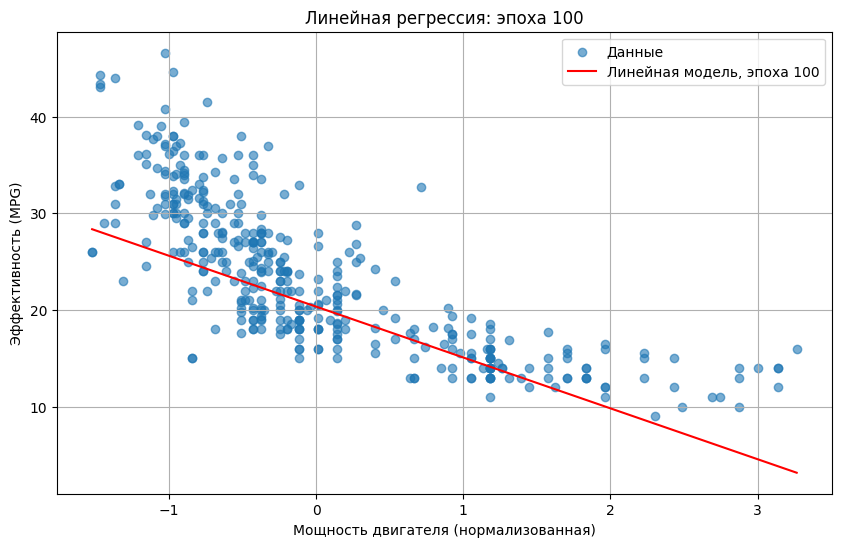

Параметры модели: w = -5.263153860018577, b = 20.336531085924754


In [16]:
# Параметры для линейной модели
alpha = 0.01   # Скорость обучения
n_epochs = 100  # Количество эпох для визуализации
m = len(y)     # Количество примеров
X = (x - np.mean(x)) / np.std(x)

# Инициализация весов для линейной модели
w, b = 0.0, 0.0

# Градиентный спуск с визуализацией
for epoch in range(n_epochs):
    # Предсказание модели
    y_pred = w * X + b
    error = y_pred - y
    
    # Вычисление градиентов
    dw = (2 / m) * np.dot(error, X)
    db = (2 / m) * np.sum(error)
    
    # Обновление параметров
    w -= alpha * dw
    b -= alpha * db

    # Построение графика на каждом шаге
    clear_output(wait=True)  # Очищаем вывод для обновления графика
    X_plot = np.linspace(min(X), max(X), 100)
    y_plot = w * X_plot + b

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.6, label="Данные")
    plt.plot(X_plot, y_plot, color='red', label=f"Линейная модель, эпоха {epoch+1}")
    plt.title(f'Линейная регрессия: эпоха {epoch+1}')
    plt.xlabel('Мощность двигателя (нормализованная)')
    plt.ylabel('Эффективность (MPG)')
    plt.legend()
    plt.grid()
    plt.show()
    
    time.sleep(0.001)  # Задержка для визуализации
print(f"Параметры модели: w = {w}, b = {b}")

#### Второго порядка

In [17]:
def gradient_descent(y, x, learning_rate=0.01, n_epochs=1000):
    # Нормализация данных
    X = (x - np.mean(x)) / np.std(x)
    m = len(y)  # Количество примеров
    
    # Инициализация весов для модели второго порядка
    w2, w1, b = 0.0, 0.0, 0.0
    
    # Для отслеживания ошибки на каждой эпохе
    loss_history = []
    
    # Градиентный спуск с визуализацией
    for epoch in range(n_epochs):
        # Предсказание модели второго порядка
        y_pred = w2 * X**2 + w1 * X + b
        loss = y_pred - y
        
        # Вычисление и сохранение текущей ошибки (среднеквадратичной ошибки)
        mse = (loss ** 2).mean()
        loss_history.append(mse)
        
        # Вычисление градиентов
        dw2 = (2 / m) * np.dot(loss, X**2)
        dw1 = (2 / m) * np.dot(loss, X)
        db = (2 / m) * np.sum(loss)
        
        # Обновление параметров
        w2 -= learning_rate * dw2
        w1 -= learning_rate * dw1
        b -= learning_rate * db

    clear_output(wait=True)  # Очищаем вывод для обновления графика
    X_plot = np.linspace(min(X), max(X), 100)
    y_plot = w2 * X_plot**2 + w1 * X_plot + b

    print(f"Параметры модели второго порядка: w2 = {w2}, w1 = {w1}, b = {b}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.6, label="Данные")  # Исправлено на alpha
    plt.plot(X_plot, y_plot, color='red', label=f"Модель второго порядка, эпоха {epoch+1}")
    plt.title(f'Полиномиальная регрессия второго порядка: эпоха {epoch+1}')
    plt.xlabel('Мощность двигателя (нормализованная)')
    plt.ylabel('Эффективность (MPG)')
    plt.legend()
    plt.grid()
    plt.show()
        
    # Построение графика обучения
    plt.figure(figsize=(10, 6))
    plt.plot(range(n_epochs), loss_history, color='blue')
    plt.title(f"График обучения: шаг обучения {learning_rate}, {n_epochs} итераций ")
    plt.xlabel("Эпоха")
    plt.ylabel("Ошибка (MSE)")
    plt.grid()
    plt.show()
    


Параметры модели второго порядка: w2 = 3.2883932076269877, w1 = -8.55548941034027, b = 17.29696905429186


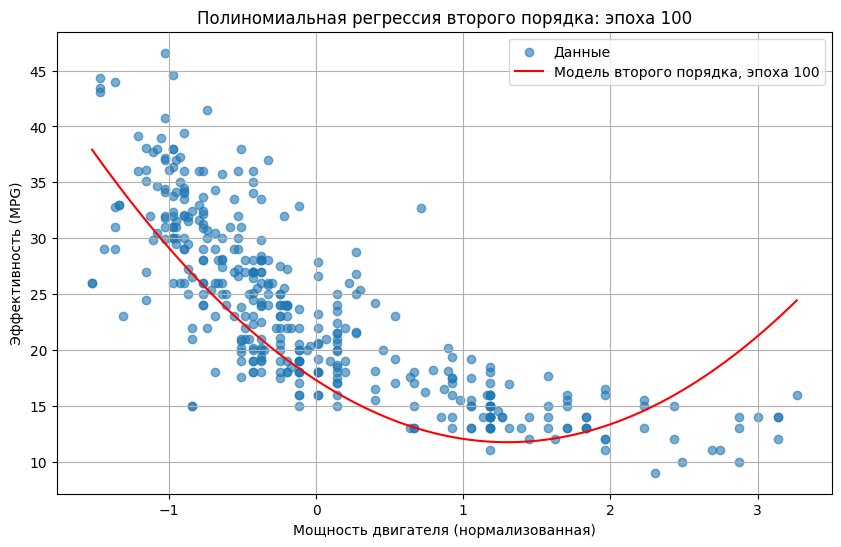

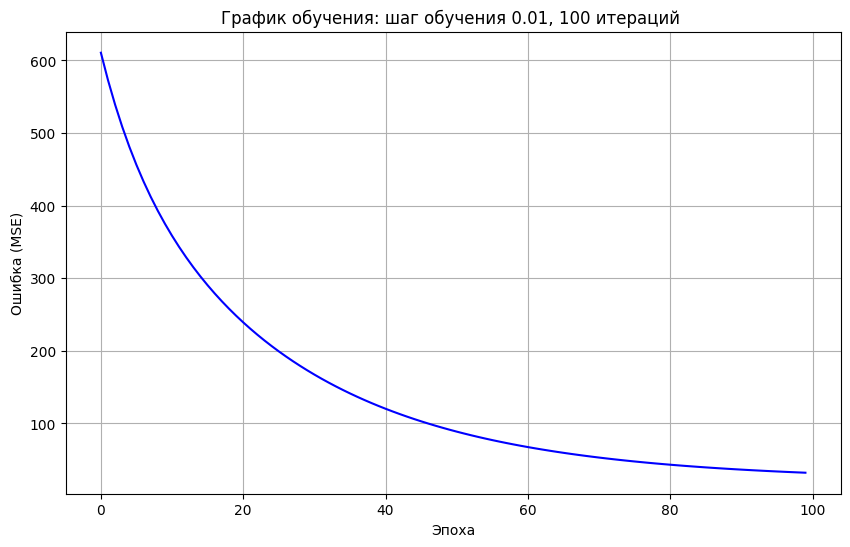

In [18]:
gradient_descent(y, x, 0.01, 100)

Параметры модели второго порядка: w2 = 1.8212812957112159, w1 = -8.0422268584631, b = 21.623147599337617


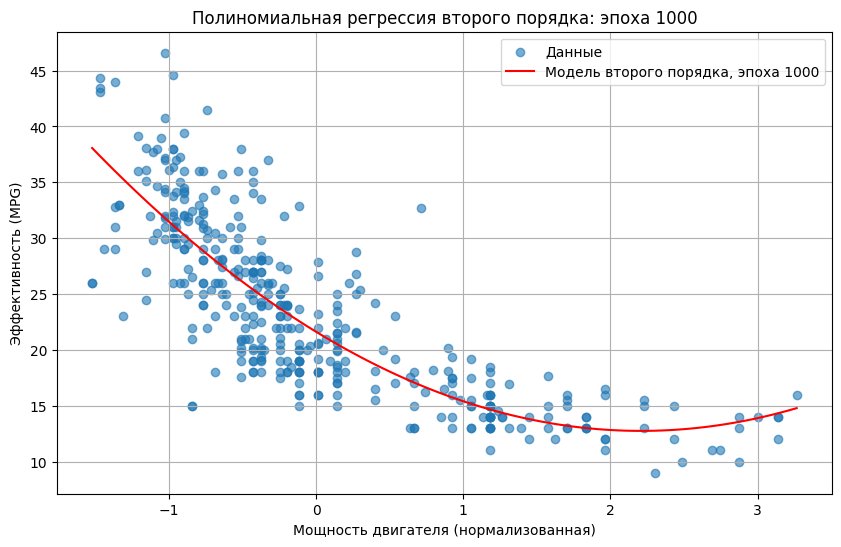

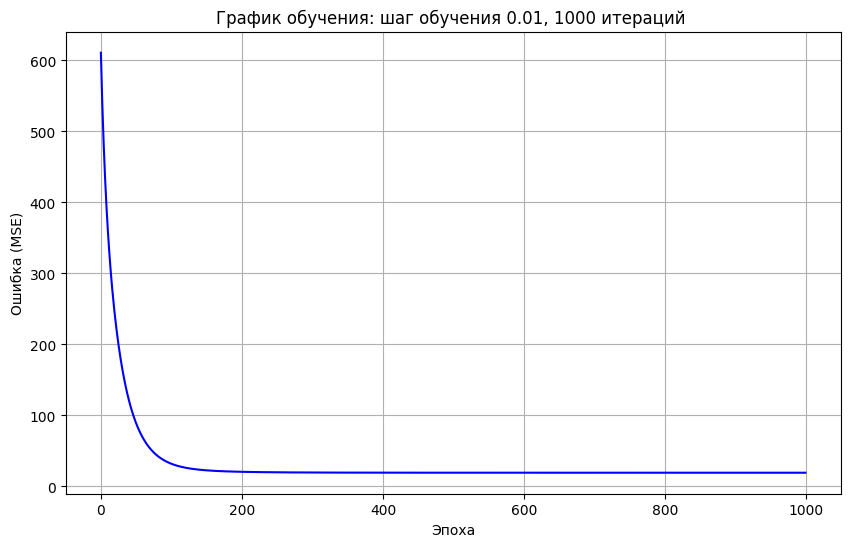

In [19]:
gradient_descent(y, x, 0.01, 1000)

Параметры модели второго порядка: w2 = 1.9050673009431536, w1 = -8.180743114812097, b = 21.49449461153118


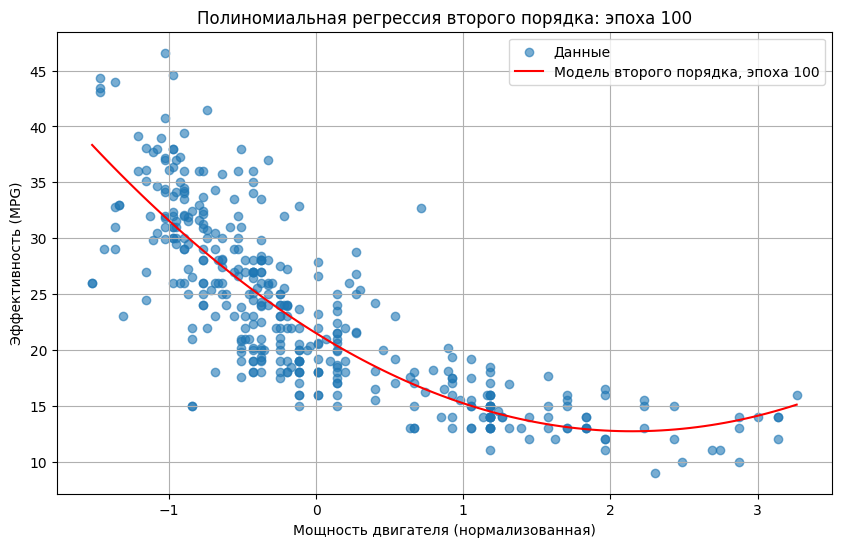

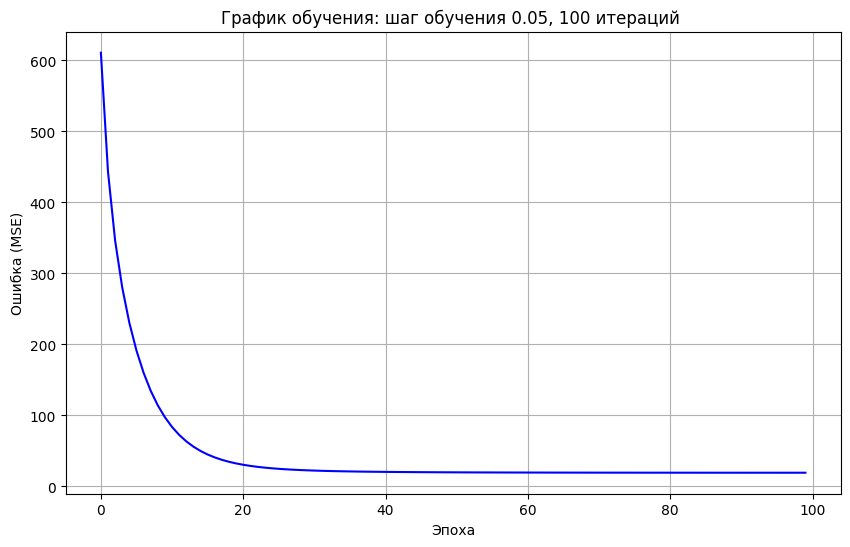

In [20]:
gradient_descent(y, x, 0.05, 100)

### стохастический и обычный градиентный для двух переменных



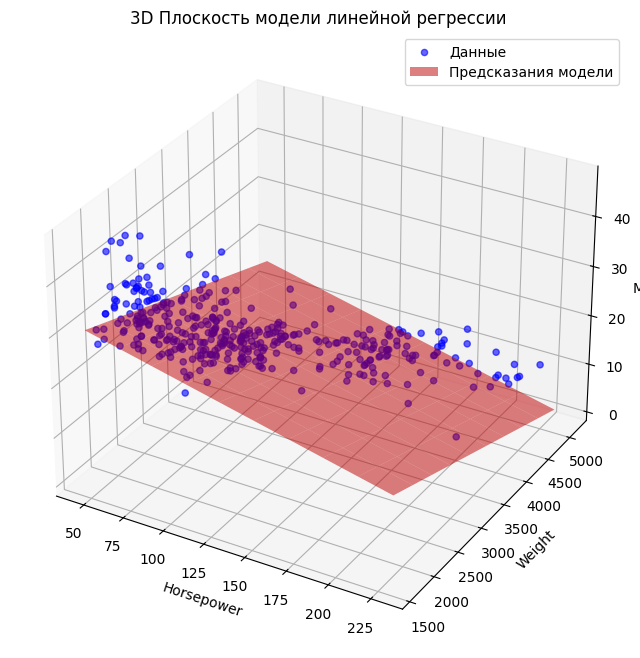

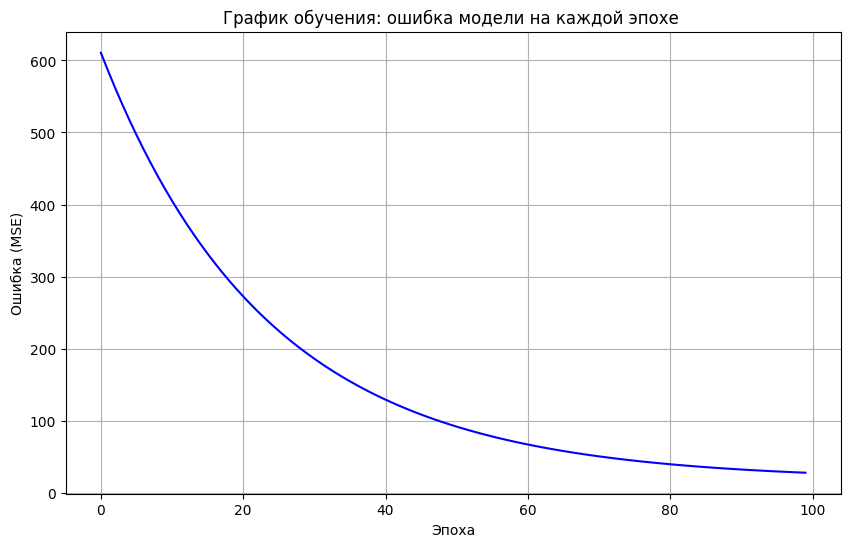

Параметры модели после обучения:
Коэффициенты (w): [-2.92364598 -3.65948236]
Смещение (b): 20.336531085924754


In [21]:
# Загрузка и очистка данных
df = sns.load_dataset('mpg')
df_clean = df.dropna(subset=['horsepower', 'weight', 'mpg'])

# Подготовка данных
X = df_clean[['horsepower', 'weight']].values
y = df_clean['mpg'].values

# Нормализация данных
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Параметры для обучения
learning_rate = 0.01
n_epochs = 100
m = len(y)  # Количество примеров

# Инициализация весов и смещения
w = np.zeros(X.shape[1])
b = 0.0

# Для отслеживания ошибки на каждой эпохе
loss_history_bg = []

# Обычный градиентный спуск
for epoch in range(n_epochs):
    # Предсказание модели
    y_pred = np.dot(X_normalized, w) + b
    error = y_pred - y
    
    # Градиенты
    dw = (2 / m) * np.dot(X_normalized.T, error)
    db = (2 / m) * np.sum(error)
    
    # Обновление параметров
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Средняя ошибка на эпоху
    loss_history_bg.append(np.mean(error ** 2))

# Плоскость предсказаний для трехмерного графика
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)  # horsepower
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)  # weight
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Нормализация сетки
x1_mesh_normalized = (x1_mesh - np.mean(X[:, 0])) / np.std(X[:, 0])
x2_mesh_normalized = (x2_mesh - np.mean(X[:, 1])) / np.std(X[:, 1])

# Предсказания для плоскости
y_plane = w[0] * x1_mesh_normalized + w[1] * x2_mesh_normalized + b

# Создание трехмерного графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки данных
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.6, label='Данные')

# Плоскость предсказаний
ax.plot_surface(x1_mesh, x2_mesh, y_plane, color='red', alpha=0.5, label='Предсказания модели')

# Настройки графика
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Плоскость модели линейной регрессии')
ax.legend()

plt.show()

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), loss_history_bg, color='blue')
plt.title("График обучения: ошибка модели на каждой эпохе ")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка (MSE)")
plt.grid()
plt.show()

print("Параметры модели после обучения:")
print("Коэффициенты (w):", w)
print("Смещение (b):", b)


#### Стохастический

Параметры модели после обучения:
Коэффициенты (w): [-1.82559045 -5.37722487]
Смещение (b): 23.643069062575485


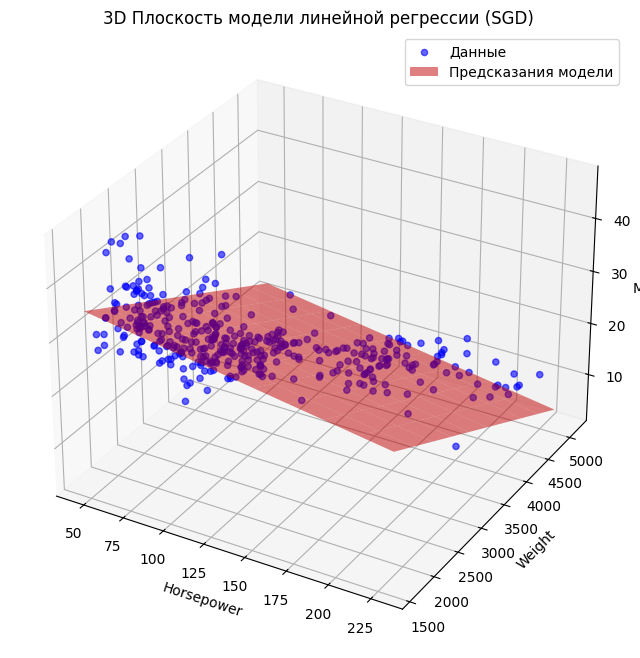

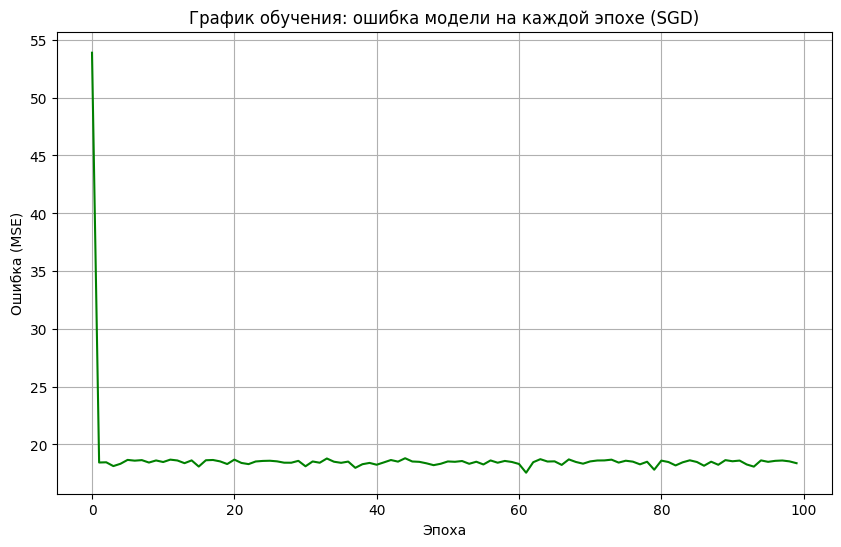

Параметры модели после обучения:
Коэффициенты (w): [-1.82559045 -5.37722487]
Смещение (b): 23.643069062575485


In [22]:
# Загрузка и очистка данных
df = sns.load_dataset('mpg')
df_clean = df.dropna(subset=['horsepower', 'weight', 'mpg'])

# Подготовка данных
X = df_clean[['horsepower', 'weight']].values
y = df_clean['mpg'].values

# Нормализация данных
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Параметры для обучения
learning_rate = 0.01
n_epochs = 100
m = len(y)  # Количество примеров

# Инициализация весов и смещения
w = np.zeros(X.shape[1])
b = 0.0

# Для отслеживания ошибки на каждой эпохе
loss_history_sgd = []

# Стохастический градиентный спуск
for epoch in range(n_epochs):
    # Перемешиваем данные в каждой эпохе
    indices = np.random.permutation(m)
    X_shuffled = X_normalized[indices]
    y_shuffled = y[indices]
    
    epoch_loss = 0
    
    for i in range(m):
        xi = X_shuffled[i, :]
        yi = y_shuffled[i]
        
        # Предсказание и ошибка
        y_pred = np.dot(xi, w) + b
        error = y_pred - yi
        
        # Градиенты
        dw = 2 * error * xi
        db = 2 * error
        
        # Обновление параметров
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Суммирование ошибки для текущего примера
        epoch_loss += error ** 2
    
    # Средняя ошибка на эпоху
    loss_history_sgd.append(epoch_loss / m)


print("Параметры модели после обучения:")
print("Коэффициенты (w):", w)
print("Смещение (b):", b)


# Плоскость предсказаний для трехмерного графика
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)  # horsepower
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)  # weight
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Нормализация сетки
x1_mesh_normalized = (x1_mesh - np.mean(X[:, 0])) / np.std(X[:, 0])
x2_mesh_normalized = (x2_mesh - np.mean(X[:, 1])) / np.std(X[:, 1])

# Предсказания для плоскости
y_plane = w[0] * x1_mesh_normalized + w[1] * x2_mesh_normalized + b

# Создание трехмерного графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Точки данных
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.6, label='Данные')

# Плоскость предсказаний
ax.plot_surface(x1_mesh, x2_mesh, y_plane, color='red', alpha=0.5, label='Предсказания модели')

# Настройки графика
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Плоскость модели линейной регрессии (SGD)')
ax.legend()

plt.show()

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), loss_history_sgd, color='green')
plt.title("График обучения: ошибка модели на каждой эпохе (SGD)")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка (MSE)")
plt.grid()
plt.show()

print("Параметры модели после обучения:")
print("Коэффициенты (w):", w)
print("Смещение (b):", b)

